# Decision Trees and Random Forests with Python

> Data set: `kyphosis.csv`
> - Kyphosis: Represents whether or not kyphosis condition was `absent` or `present` after the operation
> - Age: Age in months
> - Number: Number of vertebrae involved in the operation
> - Start: Number of the first or top most vertebrae that was operated on

In [1]:
%%html
<div>
<iframe
    width="448" height="252"
    src="https://www.youtube.com/embed/7VeUPuFGJHk"
    title="YouTube video player"
    frameborder="0"
    allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture"
    allowfullscreen>
</iframe>

<iframe
    width="448" height="252" 
    src="https://www.youtube.com/embed/J4Wdy0Wc_xQ"
    title="YouTube video player"
    frameborder="0"
    allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture"
    allowfullscreen>
</iframe>
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Reading the Data

In [3]:
df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## Exploratory Data Analysis

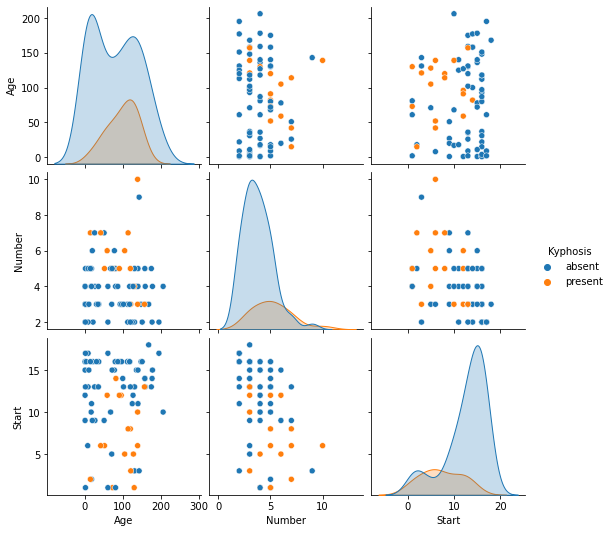

In [4]:
sns.pairplot(data=df, hue='Kyphosis')

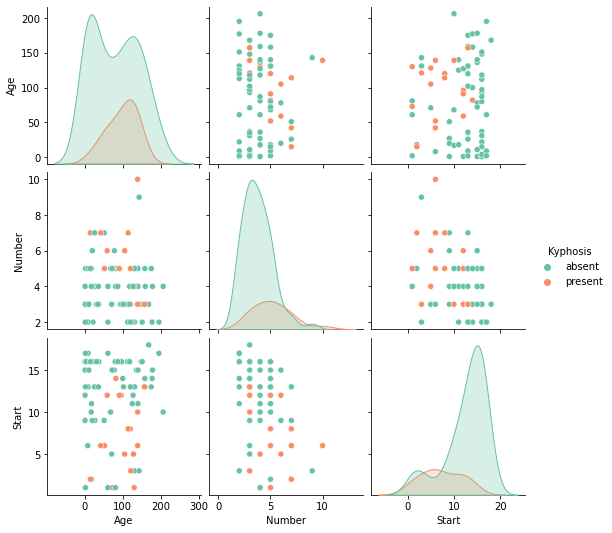

In [5]:
sns.pairplot(data=df, hue='Kyphosis', palette='Set2')

## Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Decision Trees

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
# Create an instance of DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [10]:
# Fit the DecisionTreeClassifier to the train data
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
predictions = dtree.predict(X_test)
predictions

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'present', 'absent', 'absent', 'present', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

## Tree Evaluation

In [12]:
from sklearn.metrics import classification_report, plot_confusion_matrix

              precision    recall  f1-score   support

      absent       0.76      0.84      0.80        19
     present       0.25      0.17      0.20         6

    accuracy                           0.68        25
   macro avg       0.51      0.50      0.50        25
weighted avg       0.64      0.68      0.66        25



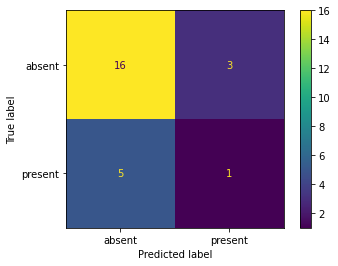

In [13]:
print(classification_report(y_test, predictions))
plot_confusion_matrix(dtree, X_test, y_test);

## Tree Visualization

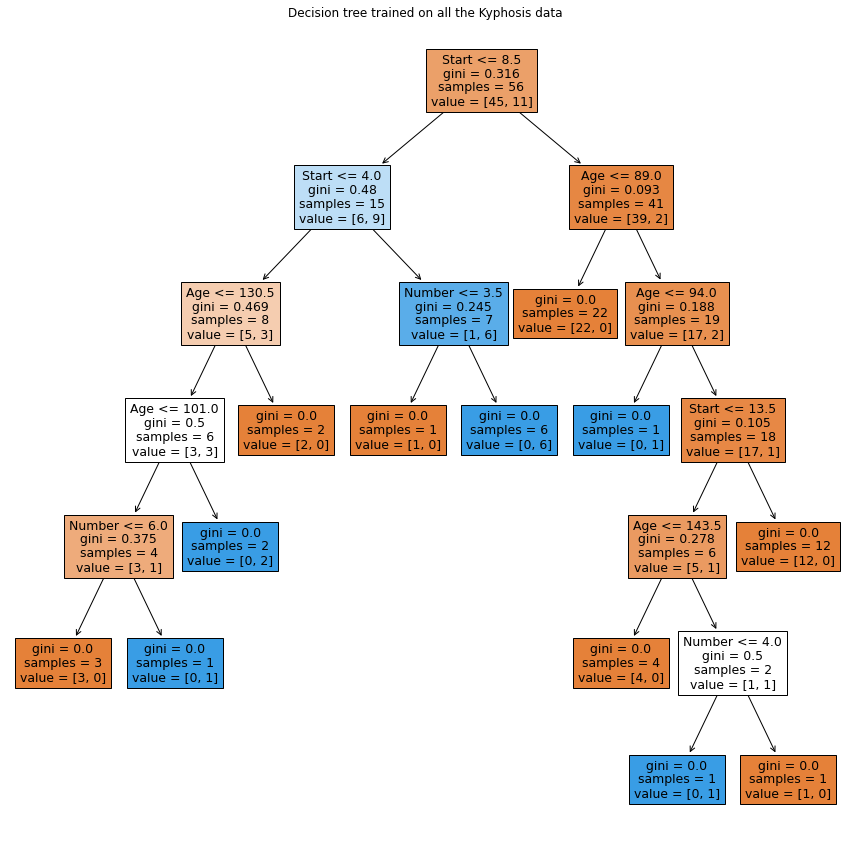

In [14]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 15))
plot_tree(dtree, filled=True, feature_names=X.columns)
plt.title('Decision tree trained on all the Kyphosis data')
plt.show()

## Random Forests

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
# Create an instance of RandomForestClassifier with the
# the number of trees in the forest 'n_estimators' = 200
rfc = RandomForestClassifier(n_estimators=200)

In [17]:
# Fit the newly created RandomForestClassifier to the train data
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [18]:
rfc_predictions = rfc.predict(X_test)
rfc_predictions

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

## Random Forest Model Evaluation

              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



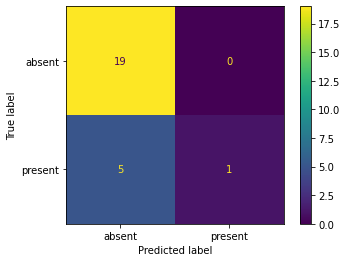

In [19]:
print(classification_report(y_test, rfc_predictions))
plot_confusion_matrix(rfc, X_test, y_test);